
## Autograded Notebook (Canvas & CodeGrade)

This notebook will be automatically graded. It is designed to test your answers and award points for the correct answers. Following the instructions for each Task carefully.
Instructions

- **Download** this notebook as you would any other ipynb file 
- **Upload** to Google Colab or work locally (if you have that set-up)
- **Delete** `raise NotImplementedError()`

- **Write** your code in the `# YOUR CODE HERE` space


- **Execute** the Test cells that contain assert statements - these help you check your work (others contain hidden tests that will be checked when you submit through Canvas)

- **Save** your notebook when you are finished
- **Download** as a ipynb file (if working in Colab)
- **Upload** your complete notebook to Canvas (there will be additional instructions in Slack and/or Canvas)




## *Data Science Unit 4 Sprint 2*

# Sprint Challenge - Neural Network Foundations

Table of Problems

1. [Defining Neural Networks](#Q1)
2. [Simple Perceptron](#Q2)
    - Perceptron
    - Multilayer Perceptron (i.e. Neural Network)
    - Analyze and Compare
4. [Keras MMP](#Q3)


____

# Before you submit your notebook you must first

1) Restart your notebook's Kernel

2) Run all cells sequentially, from top to bottom, so that cell numbers are sequential numbers (i.e. 1,2,3,4,5...)
- Easiest way to do this is to click on the **Cell** tab at the top of your notebook and select **Run All** from the drop down menu. 

____

<a id="Q1"></a>
## 1. Defining Neural Networks 

Write *your own* definitions for the following terms:

- **Neuron:**

- **Input Layer:** 

- **Hidden Layer:** 

- **Output Layer:**

- **Activation:** 

## ANSWERS:-

- Neuron is the most basic element of a Neural Network. It accepts an input and apply an activation function and passes it to the next layer.

- **Input Layer:** 

- Input layer is the very first layer of a Neural Network. The number of neurons in the input layer is equal to the number of features in any dataset. There can only be a single Input layer and passes on information to the hidden layers.

- **Hidden Layer:** 

- Hidden layer is the intermediatary layer of a Neural Network. The number of neurons in the hidden layers are less than input layer. These layers acts as intermediatary and adjusts the weight and biasis of the equation that represent a model.  


- **Output Layer:**

-  Output layer is the very last layer of a Neural Network. The number of neurons in the output layer is equal to the number of category for multi category problem or one neuron in case of a binary problem. There can only be a single output layer.

- **Activation:** 

- Activation is passing the information through a function like sigmoid function and receiving an output that is forwarded to a next layer.

- `Explain` how Back-propagation works 
- `Explain` how Gradient Descent works (mention the learning rate)
- `Explain` how Back-propagation and Gradient Descent are related   

Use your own words, but feel free to reference external materials for this question. 

## ANSWER:

1. Back-propagation is the way of tuning model using gradient descent. It involves in feeding back the losses to the layer in such a way that the weights are adjusted better (prediction is accurate) and the losses are minimized.

2. The gradient descent is to minimize the losses in any model. The gradient descent helps to reach the global minimum of losses. It does it by using learning rate. The higher the learning rate need to be balanced well. A high learning rate and the model will not be able to find the global minimum easily while a small learning rate will take the model to learn longer to reach a global minimum. 

3. Backpropagation uses Gradient Descent in feeding back the value of losses to the layers so that the new losses are minimized. 

Remember our Simple Perceptron Class from Monday. 

- Describe the process of making a prediction, i.e. how do you go from inputs to outputs?

## ANSWER:

The data is placed on the input layer and there is only one layer that is the output layer in a perceptron. The perceptron will include the activation function. The sigmoid function will squishes the input value weights and biases in order to make a prediction to either give a 0 or 1 as an output.

<a id="Q2"></a>
## 2. Simple Perceptron

In this question, you will build two neural networks using `Keras`. After you build these two models, compare the results of the model.

In [ ]:
"""
Our Dataset
"""
import numpy as np


rng = np.random.RandomState(0)

"Use this X & y in the following 2 models"
X = rng.randn(300, 2)
y = np.array(np.logical_xor(X[:, 0] > 0, X[:, 1] > 0), 
             dtype=int)

In [ ]:
X.shape

(300, 2)

In [ ]:
y

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0])

This word is speled wrong. 

### Simple Perceptron
Construct a simple perceptron using Keras. 

Make sure to include the following in your model:
- Add `1 dense layer` with a `single neuron` 
- Use a `sigmoid activation function`
- Set `epochs` to 10 
- Use the version of `crossentropy loss` that is appropriate for this data.

Your model should be called `model1` and make sure to save the results of your fit statement to a variable called `h1`. 


In [ ]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# build and fit model

# instantiate the Sequential
model1 = Sequential()

# build a single layer
model1.add(Dense(1, input_dim=2, activation='sigmoid'))

# compile the model with the loss function and optimizer
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# fit the model
h1 = model1.fit(X, y, epochs=10)

Epoch 1/10
10/10 [==============================] - 0s 749us/step - loss: 0.6938 - accuracy: 0.5467
Epoch 2/10
10/10 [==============================] - 0s 523us/step - loss: 0.6934 - accuracy: 0.5600
Epoch 3/10
10/10 [==============================] - 0s 631us/step - loss: 0.6932 - accuracy: 0.5633
Epoch 4/10
10/10 [==============================] - 0s 793us/step - loss: 0.6928 - accuracy: 0.5667
Epoch 5/10
10/10 [==============================] - 0s 1ms/step - loss: 0.6926 - accuracy: 0.5667
Epoch 6/10
10/10 [==============================] - 0s 542us/step - loss: 0.6922 - accuracy: 0.5733
Epoch 7/10
10/10 [==============================] - 0s 721us/step - loss: 0.6919 - accuracy: 0.5733
Epoch 8/10
10/10 [==============================] - 0s 927us/step - loss: 0.6916 - accuracy: 0.5767
Epoch 9/10
10/10 [==============================] - 0s 569us/step - loss: 0.6914 - accuracy: 0.5767
Epoch 10/10
10/10 [==============================] - 0s 575us/step - loss: 0.6911 - accuracy: 0.5833


In [ ]:
# Visible test
assert len(model1.get_config()["layers"]) == 2, "Make sure you only create 1 Dense layer."
assert len(h1.epoch) <=10, "Did you make sure to set epochs to 10 or less?"

In [ ]:
model1.get_config()["layers"]

[{'class_name': 'InputLayer',
  'config': {'batch_input_shape': (None, 2),
   'dtype': 'float32',
   'sparse': False,
   'ragged': False,
   'name': 'dense_527_input'}},
 {'class_name': 'Dense',
  'config': {'name': 'dense_527',
   'trainable': True,
   'batch_input_shape': (None, 2),
   'dtype': 'float32',
   'units': 1,
   'activation': 'sigmoid',
   'use_bias': True,
   'kernel_initializer': {'class_name': 'GlorotUniform',
    'config': {'seed': None}},
   'bias_initializer': {'class_name': 'Zeros', 'config': {}},
   'kernel_regularizer': None,
   'bias_regularizer': None,
   'activity_regularizer': None,
   'kernel_constraint': None,
   'bias_constraint': None}}]

In [ ]:
# Hidden tests - you will see the results when you submit to Canvas

### Multi-Layer Perceptron
Now construct a multi-layer perceptron model (also known as a neural network). 

Your neural network `must` have: 
- `2` Hidden Layers
- Select any number between `5-32` for the number of neurons in each hidden layers
- Your pick of activation function and optimizer
- Incorporate the `Callback function` below into your model
- Set epochs to `100`
- Your model should be called `model2` 
- Save the results of your fit statement to a variable called `h2`. 
- Use the version of `crossentropy loss` that is appropriate for this data.

In [ ]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        # if model reaches 99% accuracy, training is terminated 
        acc_threshold = 0.99
        if(logs.get('accuracy') > acc_threshold):   
            self.model.stop_training = True
            self.model.callback_used = True

In [ ]:
# build and fit model

# instantiate the Sequential
model2 = Sequential()

# build hidden layers
model2.add(Dense(32, input_dim=2, activation='relu'))
model2.add(Dense(16, activation='relu'))

# build output layer
model2.add(Dense(1, activation='sigmoid'))

# compile the model with the loss function and optimizer
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# fit the model
h2 = model2.fit(X, y, epochs=100, callbacks=[myCallback()])

Epoch 1/100
10/10 [==============================] - 0s 868us/step - loss: 0.6869 - accuracy: 0.5167
Epoch 2/100
10/10 [==============================] - 0s 1ms/step - loss: 0.6579 - accuracy: 0.5633
Epoch 3/100
10/10 [==============================] - 0s 912us/step - loss: 0.6355 - accuracy: 0.6400
Epoch 4/100
10/10 [==============================] - 0s 1ms/step - loss: 0.6156 - accuracy: 0.7000
Epoch 5/100
10/10 [==============================] - 0s 1ms/step - loss: 0.5971 - accuracy: 0.7500
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 0.5780 - accuracy: 0.8067
Epoch 7/100
10/10 [==============================] - 0s 895us/step - loss: 0.5598 - accuracy: 0.8533
Epoch 8/100
10/10 [==============================] - 0s 586us/step - loss: 0.5424 - accuracy: 0.8933
Epoch 9/100
10/10 [==============================] - 0s 709us/step - loss: 0.5236 - accuracy: 0.9100
Epoch 10/100
10/10 [==============================] - 0s 887us/step - loss: 0.5058 - accuracy: 0.92

In [ ]:
# Visible test
assert len(model2.get_config()["layers"]) == 4, "You should have 4 layers: Input, hidden 1, hidden 2, output."
assert 5 <= model2.get_config()["layers"][1]["config"]["units"] <= 32, "You should have 5 - 32 units in hidden layer 1, but don't."
assert 5 <= model2.get_config()["layers"][2]["config"]["units"] <= 32, "You should have 5 - 32 units in hidden layer 2, but don't."
assert h2.params["epochs"] == 100, "You didn't set epochs to 100."

In [ ]:
# Hidden tests - you will see the results when you submit to Canvas

### Analyze and Compare

**Before you Start**: You will need to install an additional library for this next segment. 

Install the package `mlxtend` into the environment you are using for the sprint challenge.

You can install this package using the following statement in the terminal

```python
pip install mlxtend
```

Or you can install this package using the following statement in your notebook

```python
!pip install mlxtend
```

If you choose to install this package from within your notebook, be sure to delete the install statement afterwards so that CodeGrade doesn't try to install it and potentially crash. 


The cells below generate decision boundary plots of your models (`model1` & `model2`). Review the plots.

In [ ]:
X.shape, y.shape

((300, 2), (300,))

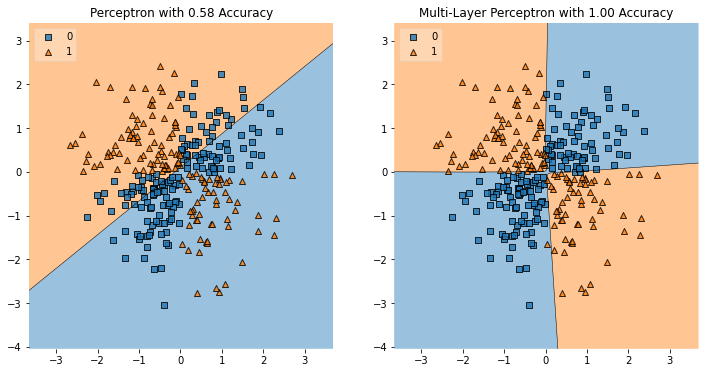

In [ ]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions


fig = plt.figure(figsize=(12,6))

for clf, hist, name, grd in zip([model1,model2], [h1, h2],['Perceptron', 'Multi-Layer Perceptron'],[1,2]):

    ax = plt.subplot(1,2, grd)
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    title = f"{name} with {hist.history['accuracy'][-1]:,.2f} Accuracy"
    plt.title(title)

plt.show()

1) Why does the Perceptron (`model1`) only achieve about 50% accuracy? 

2) What is the architectural property of the Multi-Layer Perceptron that allows it to more accurately learn the relationship between X and y? 
- Hint: recall that each layer represents a vector space and they usually have a different number of dimensions, $\mathbb{R}^N$.
   

## ANSWER:

1. The perceptron model 1 didn't have any hidden layer in between and therefore the model was only trying to learn the model through a single linearity problem. While in model 2 there are two transformations happening. Once with the relu function and another with sigmoid. This way the model is moving away from the linearity problem and is able to generalize better.

2. Multi layer transformations in a multi-layer perceptron helps understand the model better.

## 3. Keras MMP <a id="Q3"></a>

- Implement a Multilayer Perceptron architecture of your choosing using the Keras library. 
- Train your model and report its baseline accuracy. 
- Then `hyper-parameters tune two parameters each with no more than 2 values each`
    - Due to limited computational resources on CodeGrade `DO NOT INCLUDE ADDITIONAL PARAMETERS OR VALUES PLEASE`
- Report your optimized model's accuracy
- Use the Heart Disease Dataset provided (binary classification)
- Use an appropriate loss function for a binary classification task
- Use an appropriate activation function on the final layer of your network.
- Train your model using verbose output for ease of grading.
- Use GridSearchCV to hyper-parameters tune your model. 
    - **Use `n_jobs` = 1**
- When hyper-parameters tuning, show you work by adding code cells for each new experiment.
- Report the accuracy for each combination of hyper-parameters as you test them so that we can easily see which resulted in the highest accuracy.

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# load data
data_path = 'https://raw.githubusercontent.com/ryanleeallred/datasets/master/heart.csv'
df = pd.read_csv(data_path)
df = df.sample(frac=1)
print(df.shape)
df.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
109,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
226,62,1,1,120,281,0,0,103,0,1.4,1,1,3,0
14,58,0,3,150,283,1,0,162,0,1.0,2,0,2,1
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
247,66,1,1,160,246,0,1,120,1,0.0,1,3,1,0


In [ ]:
# Create an input matrix named 'X' store it in a 2D numpy array
df_numpy = df.to_numpy()
X = df_numpy[:,0:13]

# Create an output vector for the labels named 'Y', store it in 1D numpy array
Y = df_numpy[:,13]

In [ ]:
np.unique(Y) # this is a case of binary classification problem

array([0., 1.])

In [ ]:
# Visible Testing
assert X.shape[0] == 303, "Did you drop/lose some rows in X? Did you properly load and split the data?"
assert X.shape[1] == 13, "Did you drop/lose some columns in X? Did you properly load and split the data?"
assert len(Y)== 303, "Did you drop/lose some rows in Y? Did you properly load and split the data?"

In [ ]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
# Create a function named 'create_model' that returns a complied keras model -  required for KerasClassifier
def create_model():
    # Create the model
    model = Sequential()
    model.add(Dense(32, activation='relu', input_dim=13))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    # Compile
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # return model
    return model

In [ ]:
# Visible Testing
assert create_model().__module__ == 'tensorflow.python.keras.engine.sequential', "create_model should return a keras model that was created using the Sequential class."

In [ ]:
# Pass 'create_model' into KerasClassifier, store KerasClassifier to a variable named 'model'
model = KerasClassifier(build_fn=create_model)

In [ ]:
# Visible Testing
assert model.__module__ == 'tensorflow.python.keras.wrappers.scikit_learn', "model should be a instance of KerasClassifier."

In [ ]:
# Define the grid search parameters inside a dictionary named 'param_grid' 
# Use 2 hyper-parameters with 2 possible values for each 

param_grid = {
    'epochs': [40, 5],
    'batch_size': [8, 32]
}

In [ ]:
assert len(param_grid.keys()) == 2, "Did you create a param dict with 2 hyper-parameters as keys?"

In [ ]:
# Create Grid Search object and name it 'gs'
# Run Grid Search 
gs = GridSearchCV(model, param_grid, n_jobs=1)
grid_result = gs.fit(X, Y, verbose=1)

=====================] - 0s 673us/step - loss: 0.4771 - accuracy: 0.7397
Epoch 32/40
8/8 [==============================] - 0s 665us/step - loss: 0.4432 - accuracy: 0.7934
Epoch 33/40
8/8 [==============================] - 0s 658us/step - loss: 0.4141 - accuracy: 0.8182
Epoch 34/40
8/8 [==============================] - 0s 944us/step - loss: 0.4416 - accuracy: 0.8017
Epoch 35/40
8/8 [==============================] - 0s 692us/step - loss: 0.4440 - accuracy: 0.7851
Epoch 36/40
8/8 [==============================] - 0s 587us/step - loss: 0.4486 - accuracy: 0.7810
Epoch 37/40
8/8 [==============================] - 0s 664us/step - loss: 0.4304 - accuracy: 0.8264
Epoch 38/40
8/8 [==============================] - 0s 1ms/step - loss: 0.4128 - accuracy: 0.8347
Epoch 39/40
8/8 [==============================] - 0s 634us/step - loss: 0.4448 - accuracy: 0.7975
Epoch 40/40
2/2 [==============================] - 0s 4ms/step - loss: 0.4765 - accuracy: 0.7049
Epoch 1/40
8/8 [========================

In [ ]:
# your grid_result object should be able to run in this code 
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}") 

Best: 0.7684153079986572 using {'batch_size': 8, 'epochs': 40}
Means: 0.7684153079986572, Stdev: 0.07726119634060151 with: {'batch_size': 8, 'epochs': 40}
Means: 0.6895081996917725, Stdev: 0.05500770708477045 with: {'batch_size': 8, 'epochs': 5}
Means: 0.7490710258483887, Stdev: 0.03577069619646983 with: {'batch_size': 32, 'epochs': 40}
Means: 0.5544808804988861, Stdev: 0.1481210696041231 with: {'batch_size': 32, 'epochs': 5}


My best score after multiple search through GridSearchCV and Manually is Best: 0.8018579244613647 using {'batch_size': 8, 'epochs': 40}.